In [1]:
import torch
import torch.nn as nn
import schedulers

from time import perf_counter

import pandas as pd
import numpy as np

from superonn_final import SuperONN2d

import matplotlib.pyplot as plt

In [2]:
def take_qth_power(x, q, powers=None, dim=1, with_w0=False):
    if with_w0:
        #powers = torch.arange(0, q+1, device=x.device).repeat(x.shape[dim])
        x = x.repeat_interleave(q+1, dim=dim)
    else:
        #powers = torch.arange(1, q+1, device=x.device).repeat(x.shape[dim])
        x = x.repeat_interleave(q, dim=dim)
    y = torch.pow(x.transpose(dim, -1), powers)
    y = y.transpose(dim, -1)
    return y

In [24]:
son = SuperONN2d(3, 3, kernel_size=5, padding=5//2, q=2, shift_init='random_int', max_shift=10)
son.shifts

tensor([[[ 0.2000, -0.5000],
         [ 0.5000,  0.4000],
         [-0.0000, -0.7000]]])

In [19]:
x = torch.randn(2, 3, 4, 4, device='cuda')

In [11]:
q = 3
y1 = torch.cat([x**i for i in range(1, q+1)], dim=1)
y11 = torch.pow(x.repeat((1,q,1,1)).transpose(1, -1), torch.arange(1, q+1, device=x.device).repeat_interleave(x.shape[1])).transpose(1, -1)
y2 = take_qth_power(x, q, dim=1, with_w0=False)

In [20]:
%%timeit
y1 = torch.cat([x**i for i in range(1, q+1)], dim=1)

103 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
%%timeit
y11 = torch.pow(x.repeat((1,q,1,1)).transpose(1, -1), torch.arange(1, q+1, device=x.device).repeat_interleave(x.shape[1])).transpose(1, -1)

384 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
powers = torch.arange(1, q+1, device=x.device).repeat(x.shape[1])

In [21]:
%%timeit
y2 = take_qth_power(x, q, powers, dim=1, with_w0=False)

327 µs ± 9.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
s = SuperONN2d(64, 64, q=3, kernel_size=3, padding=1, groups='depthwise', full_groups=2)

AssertionError: out_channels (64) must be a multiple of groups (128)

In [10]:
batch_size = 2
channels = 3
height = 5
width = 5
inputs = 2*torch.ones(batch_size, channels, height, width)

In [12]:
out = torch.pow(inputs.permute(0,2,3,1),torch.tensor([1,2,3]))

In [15]:
out = out.permute(0,3,1,2)

In [18]:
out.repeat_interleave(3, dim=1)



tensor([[[[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]],

         [[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]],

         [[2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.],
          [2., 2., 2., 2., 2.]],

         [[4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.]],

         [[4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.]],

         [[4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.],
          [4., 4., 4., 4., 4.]],

         [[8., 8., 8., 8., 8

In [27]:
out.repeat((1,3,1,1))
torch.arange(1,4).repeat(inputs.shape[1])


tensor([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [51]:
def take_qth_power(x, q, dim=1, with_ones=False):
    if with_ones:
        powers = torch.arange(0, q+1).repeat(x.shape[dim])
        x = x.repeat_interleave(q+1, dim=dim)
    else:
        powers = torch.arange(1, q+1).repeat(x.shape[dim])
        x = x.repeat_interleave(q, dim=dim)
    y = torch.pow(x.transpose(dim, -1), powers)
    y = y.transpose(dim, -1)
    return y

In [59]:
import torch

# Create input tensor of shape (batch_size, channels, height, width)
batch_size = 2
channels = 3
height = 2
width = 2
x = 2*torch.ones(batch_size, channels, height, width)
q = 2

y = take_qth_power(x, q, with_ones=True)
print(y.shape)

torch.Size([2, 9, 2, 2])


In [60]:
y

tensor([[[[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]],

         [[4., 4.],
          [4., 4.]],

         [[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]],

         [[4., 4.],
          [4., 4.]],

         [[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]],

         [[4., 4.],
          [4., 4.]]],


        [[[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]],

         [[4., 4.],
          [4., 4.]],

         [[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]],

         [[4., 4.],
          [4., 4.]],

         [[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]],

         [[4., 4.],
          [4., 4.]]]])

In [19]:
class A:
    from math import gcd
    from sklearn.metrics import roc_auc_score

    def do(self, x, y):
        print(self.roc_auc_score(y_true=[0,1,1,0], y_score=[0.2,0.3,0.4,0.5]))
        return self.gcd(x, y)

In [20]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_true=[0,1,1,0], y_score=[0.2,0.3,0.4,0.5]))

0.5


In [21]:
A().do(10, 5)

TypeError: roc_auc_score() got multiple values for argument 'y_true'

In [8]:
x = torch.randn(1, 3, 5, 5)
torch.amax(x, dim=1, keepdim=True)

tensor([[[[ 1.5709,  0.4231,  1.1433, -0.0023,  0.5400],
          [ 0.8870,  0.6470,  0.1103,  0.9796, -0.3248],
          [ 2.2853, -0.2149,  1.3878,  1.9949,  1.3244],
          [ 1.4218,  2.0696,  1.9298,  1.3648,  0.1852],
          [ 0.9874,  0.1893,  1.3503,  0.1235,  0.6348]]]])

In [2]:
nn.Conv2d(4, 2, 5, padding=2, groups=1).weight.shape

torch.Size([2, 4, 5, 5])

In [10]:
sup2d = SuperONN2d(3, 3, 3, padding=2, q=2, bias=False, with_w0=True)

In [11]:
sup2d.weight.shape

torch.Size([3, 9, 3, 3])

In [29]:
x = torch.randn(1, 3, 32, 32)

In [30]:
sup2d_out = sup2d(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


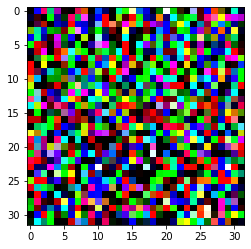

In [31]:
plt.imshow(x.squeeze().permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


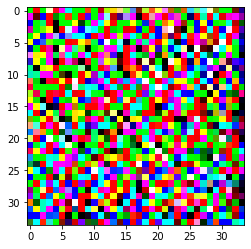

In [32]:
plt.imshow(sup2d_out.detach().squeeze().permute(1,2,0))

In [16]:
SuperONN2d(4, 2, 5, padding=2, q=2).shifts.shape

torch.Size([1, 4, 2])

In [17]:
# All channels are shifted by the same amount (e.g. RGB)
SuperONN2d(4, 2, 5, padding=2, q=2, shift_groups=1).shifts.shape

torch.Size([1, 1, 2])

In [18]:
# First half and the second half have different shifts
SuperONN2d(4, 2, 5, padding=2, q=2, shift_groups=2).shifts.shape

torch.Size([1, 2, 2])

In [19]:
# By default, shift_groups = in_channels = 4
SuperONN2d(4, 2, 5, padding=2, q=2, shift_groups=4).shifts.shape

torch.Size([1, 4, 2])

In [45]:
# Reduces complexity by a factor of 'groups'
SuperONN2d(9, 18, 5, padding=2, q=2, groups=18).weight.shape

torch.Size([18, 1, 5, 5])

In [47]:
# Semi-mode BUT 'shift_groups' of neurons have different shifts
# AND neurons process channels raised to different powers
SuperONN2d(9, 18, 5, padding=2, q=2, groups=18, shift_groups=3).shifts.shape

torch.Size([1, 3, 2])

In [55]:
SuperONN2d(9, 18, 5, padding=2, q=1, full_groups=6).shifts.shape

torch.Size([6, 9, 2])

In [62]:
SuperONN2d(9, 18, 5, padding=2, q=3, full_groups=6, groups=6, shift_groups=3).weight.shape

torch.Size([18, 27, 5, 5])

In [69]:
SuperONN2d(3, 24, 5, padding=2, q=2, full_groups=4, groups=12, shift_groups=3).weight.shape

torch.Size([24, 2, 5, 5])

In [38]:
for in_c in [3, 8, 16, 64]:
    for out_c in [3, 8, 16, 64]:
        for q in [2, 3, 4, 5, 6, 7]:
            for full_groups in range(out_c):
                for groups in range(min(out_c, in_c * q * full_groups)):
                    for shift_groups in range(in_c):
                        x = torch.randn(1, in_c, 5, 5)

                        try:
                            sonn = SuperONN2d(
                                in_c, 
                                out_c,
                                kernel_size=3,
                                padding=1,
                                q=q,
                                full_groups=full_groups,
                                groups=groups,
                                shift_groups=shift_groups,
                                max_shift=10,
                                learnable=True
                            )
                            conv = nn.Conv2d(in_c, out_c, kernel_size=3, padding=1, groups=groups)
                        except Exception as e:
                            continue

                        try:
                            outconv = conv(x)
                            outsonn = sonn(x)
                        except:
                            print(f"in_c={in_c}, out_c={out_c}, q={q}, full_groups={full_groups}, groups={groups}, shift_groups={shift_groups}")
                            raise Exception("Passing through conv/sonn failed")
                        
                        if not torch.equal(torch.tensor(outconv.shape), torch.tensor(outsonn.shape)):
                            raise Exception("Shapes don't match")
                        
                        sonnw = torch.tensor(sonn.weight.shape)
                        convw = torch.tensor(conv.weight.shape)

                        sonnw[1] = sonnw[1] * (sonn.groups // sonn.full_groups) // sonn.q // groups

                        if not torch.equal(sonnw, convw):
                            print(f"sonnw={sonnw}, convw={convw}")
                            print(f"in_c={in_c}, out_c={out_c}, q={q}, full_groups={full_groups}, groups={groups}, shift_groups={shift_groups}")
                            raise Exception("Weights don't match")

KeyboardInterrupt: 

In [71]:
def do_runtime_test(models, x, device, repeats):
    assert device != "cuda" or torch.cuda.is_available(), "CUDA not available"

    models = {k: v.to(device) for k, v in models.items()}
    x = x.to(device)

    # warmup
    for model in models:
        for _ in range(10):
            y = models[model](x)
        torch.cuda.synchronize()

    runtimes = {}
    for model in models:
        start = perf_counter()
        for _ in range(repeats):
            y = models[model](x)
        torch.cuda.synchronize()
        end = perf_counter()
        runtimes[model] = end - start

    return runtimes

In [72]:
device = "cuda" if torch.cuda.is_available() else "cpu"
x = torch.randn(1, 64, 25, 25).to(device)

In [73]:
models = {
    "sonn": SuperONN2d(64, 64, q=3, kernel_size=3, padding=1, groups=1, max_shift=10, learnable=True).to(device),
    "sonn_dw": SuperONN2d(64, 64, q=3, kernel_size=3, padding=1, groups=64, full_groups=1, max_shift=10, learnable=True).to(device),
    "sonn_full": SuperONN2d(64, 64, q=3, kernel_size=3, padding=1, full_groups=8, groups=8, max_shift=10, learnable=True).to(device),
    "sonn_full_dw": SuperONN2d(64, 64, q=3, kernel_size=3, padding=1, full_groups=8, groups=64, max_shift=10, learnable=True).to(device),
}

In [74]:
params = {
    key: sum(list(map(lambda x: x.numel(), model.parameters()))) for key, model in models.items()
}

In [75]:
gpu_runtimes = do_runtime_test(models, x, device, repeats=1000)
cpu_runtimes = do_runtime_test(models, x, "cpu", repeats=1000)

In [76]:
gpu_runtimes

{'sonn': 1.3564484999999422,
 'sonn_dw': 1.2391488999999183,
 'sonn_full': 2.2865383999999267,
 'sonn_full_dw': 1.3228245000000243}

In [77]:
cpu_runtimes

{'sonn': 1.4505371000000196,
 'sonn_dw': 1.4037164999999732,
 'sonn_full': 7.415974100000085,
 'sonn_full_dw': 8.97052860000008}

In [78]:
data = {model: [params[model], gpu_runtimes[model], cpu_runtimes[model], models[model].defaults] for model in models}

In [79]:
pd.DataFrame(data, index=["params", "gpu", "cpu", "params"]).T.to_csv("superonn_final_runtimes.csv")

In [21]:
# Shift repeat test
# shift_groups = 3, in_channels = 12
shifts = torch.tensor([[0, 1, 2], [0, 1, 2]]).T
new_shifts = torch.repeat_interleave(shifts, 12 // 3, 0)

assert shifts.shape == (3, 2)
assert new_shifts.shape == (12, 2)
assert torch.allclose(shifts[0, :], new_shifts[0:4, :])
print(shifts)
print(new_shifts)

tensor([[0, 0],
        [1, 1],
        [2, 2]])
tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [2, 2],
        [2, 2],
        [2, 2],
        [2, 2]])


In [65]:
# Reshape test
n = 1
in_c = 2
out_c = 3
h = 2
w = 2

# A 2x2 image with 2 channels, one of them is all 1s and the other is all 2s.
x = torch.tensor([1,1,1,1,2,2,2,2]).reshape(n, in_c, h, w)
print(x, x.shape)

# Concat the channels out_c times.
y = torch.cat([x for _ in range(out_c)], 1)
print(y, y.shape)

# Now, should we reshape it to (n, in_c, out_c, h, w) or (n, out_c, in_c, h, w)?
# (n, out_c, in_c, h, w) is the correct shape, as we have (n x out_c) images with in_c channels, not (n x in_c) images with out_c channels.
z = y.reshape(n, out_c, in_c, h, w)
print(z)

tensor([[[[1, 1],
          [1, 1]],

         [[2, 2],
          [2, 2]]]]) torch.Size([1, 2, 2, 2])
tensor([[[[1, 1],
          [1, 1]],

         [[2, 2],
          [2, 2]],

         [[1, 1],
          [1, 1]],

         [[2, 2],
          [2, 2]],

         [[1, 1],
          [1, 1]],

         [[2, 2],
          [2, 2]]]]) torch.Size([1, 6, 2, 2])
tensor([[[[[1, 1],
           [1, 1]],

          [[2, 2],
           [2, 2]]],


         [[[1, 1],
           [1, 1]],

          [[2, 2],
           [2, 2]]],


         [[[1, 1],
           [1, 1]],

          [[2, 2],
           [2, 2]]]]])


In [76]:
# Shift reshape test
in_channels = 4
full_groups = 3
shift_groups = 2
shifts = torch.tensor([[[0, 1, 2], [0, 1, 2]], [[0, 1, 2], [0, 1, 2]]]).T
print(shifts.shape)

new_shifts = torch.repeat_interleave(shifts, in_channels // shift_groups, 1)
print(new_shifts.shape)

print(shifts.reshape(full_groups * shift_groups, 2))
print(new_shifts.reshape(full_groups * in_channels, 2))

torch.Size([3, 2, 2])
torch.Size([3, 4, 2])
tensor([[0, 0],
        [0, 0],
        [1, 1],
        [1, 1],
        [2, 2],
        [2, 2]])
tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [2, 2],
        [2, 2],
        [2, 2],
        [2, 2]])


In [32]:
torch.cat(x.tile(4).chunk(4, -1), 1)

tensor([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15]],

         [[16, 17, 18, 19],
          [20, 21, 22, 23],
          [24, 25, 26, 27],
          [28, 29, 30, 31]],

         [[32, 33, 34, 35],
          [36, 37, 38, 39],
          [40, 41, 42, 43],
          [44, 45, 46, 47]],

         [[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15]],

         [[16, 17, 18, 19],
          [20, 21, 22, 23],
          [24, 25, 26, 27],
          [28, 29, 30, 31]],

         [[32, 33, 34, 35],
          [36, 37, 38, 39],
          [40, 41, 42, 43],
          [44, 45, 46, 47]],

         [[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15]],

         [[16, 17, 18, 19],
          [20, 21, 22, 23],
          [24, 25, 26, 27],
          [28, 29, 30, 31]],

         [[32, 33, 34, 35],
          [36, 37, 38, 39],
          [40, 41, 42, 43],
    